*Script criado por Rafael Cesario de Abreu em Jan/2022 para o curso Aplicações em meteorologia usando Python*

*Revisado por Rita Yuri Ynoue e Natália Machado Crespo*

# Aula 2

Nesta aula, faremos a análise de séries temporais de dados de uma estação meteorológica. Será mostrado como:

*   Abrir arquivos texto com o pacote `pandas`
*   Como filtrar dados
*   Cálculo de agregações mensais, sazonais e anuais
*   Utilizar o `groupby` para fazer cálculos e a função anônima `lambda`
*   Cálculo de anomalias
*   Cálculo das tendências com o pacote `statsmodels` e visualização com o `pandas`
*   Métodos de preenchimento de dados



**Pacotes**

* **PANDAS:** Pandas é um pacote Python que proporciona estruturas de dados rápidas, flexíveis e expressivas, desenhadas para trabalhar com dados "relacionais" ou "nomeados", é fácil e intuitivo. Pandas é usado para diferentes tipos de dados, como: dados tabelados como SQL e Excel, séries temporais ordenadas ou não ordenadas, matrizes com nomes nas colunas e linhas, qualquer tipo de dado que seja nomeado

* **STATSMODELS**: Statsmodels é um pacote Python com classes e funções para a estimativa de vários modelos estatísticos diferentes, testes de hipótese e exploração de dados.

**Antes de começar** a falar do `pandas` é importante entender o que é um dicionário. O dicionário é uma estrutura de dados que armazena esses dados em uma composição de chave e valor. Por exemplo:


In [ ]:
my_dictionary = {'prec': 5, 'temp': 'twenty degrees celsius'}

my_dictionary['prec']

5

Ou seja, selecionamos a chave `'prec'` que tinha guardado o valor 5. Como visto acima o valor não precisa ser um número, ele pode ser qualquer tipo de objeto: um float, inteiro, string, uma função python, um array etc. Esse modo de referência com formato chave/valor é extremamente importante na utilização do `pandas`.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para ler os dados utilizamos o comando `pd.read_csv` que pode ser usado em qualquer tipo de arquivo texto, mesmo aqueles que não terminam com a extensão `.csv`. Esse comando infere o nome das colunas pela primeira linha, atribui um índice para cada linha e assume que o separador padrão é a vírgula. Vamos começar com dados de observação diária de precipitação e temperatura da Estação Meteorológica do IAG (`iag_cientec`)

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/iag_cientec.csv')

df

,prec;temp;date
0,0.0;19.0;01 01/01/1933
1,0.0;18.9;02 01/01/1933
2,0.0;18.9;03 01/01/1933
3,0.0;18.9;04 01/01/1933
4,0.0;18.9;05 01/01/1933
...,...
745100,0.0;21.0;21 31/12/2017
745101,0.0;21.0;22 31/12/2017
745102,0.0;21.2;23 31/12/2017
745103,0.0;;00 01/01/2018


**Lembrar que no python os índices começam com 0 (zero)!**

Modificando o separador para ponto e vírgula temos que:

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/iag_cientec.csv', sep=';')

df

,prec,temp,date
0,0.0,19.0,01 01/01/1933
1,0.0,18.9,02 01/01/1933
2,0.0,18.9,03 01/01/1933
3,0.0,18.9,04 01/01/1933
4,0.0,18.9,05 01/01/1933
...,...,...,...
745100,0.0,21.0,21 31/12/2017
745101,0.0,21.0,22 31/12/2017
745102,0.0,21.2,23 31/12/2017
745103,0.0,NaN,00 01/01/2018


Apesar de agora as colunas estarem certas, vemos que a coluna de data ainda não é um objeto datetime quando vemos o tipo de cada coluna

In [ ]:
df.dtypes

prec    float64
temp    float64
date     object
dtype: object

Dessa forma, vamos converter a coluna em data usando o `pd.to_datetime` que irá receber a coluna de `'date'` e transformar em um datetime baseado no formato que especificarmos

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%H %d/%m/%Y')

df

,prec,temp,date
0,0.0,19.0,1933-01-01 01:00:00
1,0.0,18.9,1933-01-01 02:00:00
2,0.0,18.9,1933-01-01 03:00:00
3,0.0,18.9,1933-01-01 04:00:00
4,0.0,18.9,1933-01-01 05:00:00
...,...,...,...
745100,0.0,21.0,2017-12-31 21:00:00
745101,0.0,21.0,2017-12-31 22:00:00
745102,0.0,21.2,2017-12-31 23:00:00
745103,0.0,NaN,2018-01-01 00:00:00


Podemos fazer isso ainda no próprio `read_csv`, usando os argumentos `parse_dates` que recebe o nome das colunas que queremos e as transforma em data e o argumento `date_parser` que é a função que fará essa conversão para cada ponto. Existem formatos que já são entendidos pelo `pandas` que não necessitam do `date_parser`, por exemplo, se o formato fosse `YYYY-mm-dd HH:MM:SS` então não precisaríamos criar um `date_parser` específico. Para mais opções na hora de ler os arquivos veja a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [ ]:
def date_parser(x):
  return pd.to_datetime(x, format='%H %d/%m/%Y')

# le arquivo com separador de ponto e virgula aplicando um formato de data especifico
df = pd.read_csv('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/iag_cientec.csv', sep=';', parse_dates=['date'], date_parser=date_parser)

df.dtypes

prec           float64
temp           float64
date    datetime64[ns]
dtype: object

Como temos apenas até o primeiro dia de 2018 vamos filtrar até 2017. Fazemos isso com o seguinte comando:

In [ ]:
df = df[df['date'].dt.year <= 2017]  # leia como "df onde o ano da coluna 'date' de df é menor ou igual a 2017"

Frequentemente precisamos converter os valores fornecidos em séries temporais com agregações menores, como mensais, anuais ou sazonais. O comando `resample` serve para isso, ele basicamente agrupa o dataframe em subseções em que um método pode ser aplicado, uma média, soma etc

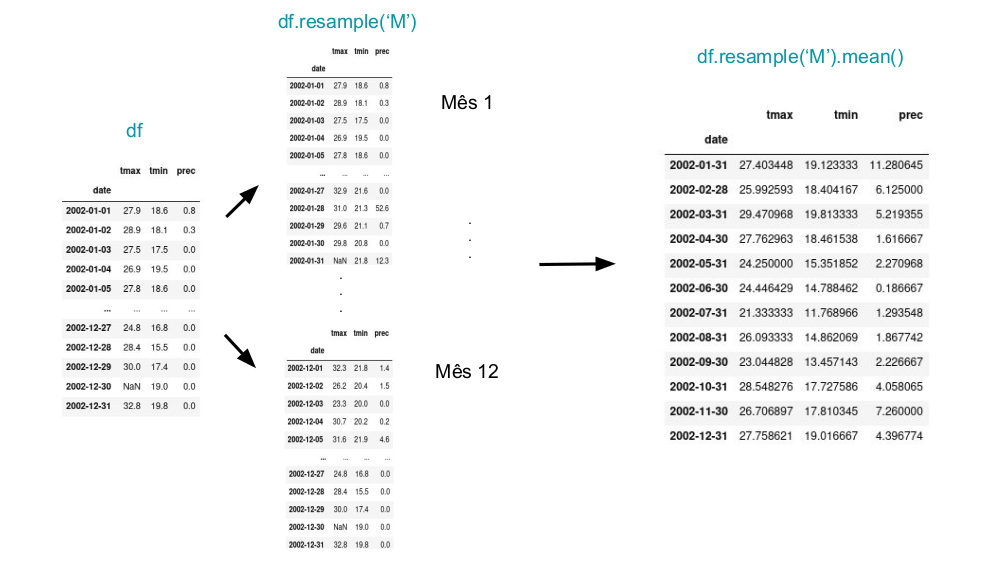

In [ ]:
df.resample('A', on='date').mean() # Média anual

,prec,temp
date,,
1933-12-31,0.097020,16.890113
1934-12-31,0.122340,17.700274
1935-12-31,0.146427,17.595183
1936-12-31,0.128632,17.896767
1937-12-31,0.151176,17.333082
...,...,...
2013-12-31,0.171404,19.294521
2014-12-31,0.139612,20.067934
2015-12-31,0.208836,20.344658


In [ ]:
df.resample('A', on='date').sum() # Soma anual

,prec,temp
date,,
1933-12-31,849.8,147940.5
1934-12-31,1071.7,155054.4
1935-12-31,1282.7,154133.8
1936-12-31,1129.9,157205.2
1937-12-31,1324.3,151837.8
...,...,...
2013-12-31,1501.5,169020.0
2014-12-31,1223.0,175795.1
2015-12-31,1829.4,178219.2


Se quisermos aplicar um método (média ou soma) para cada uma das diferentes variáveis, usamos um dicionário para especificar qual método será aplicado.


In [ ]:
df_annual = df.resample('A', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})

df_annual

,prec,temp
date,,
1933-12-31,849.8,16.890113
1934-12-31,1071.7,17.700274
1935-12-31,1282.7,17.595183
1936-12-31,1129.9,17.896767
1937-12-31,1324.3,17.333082
...,...,...
2013-12-31,1501.5,19.294521
2014-12-31,1223.0,20.067934
2015-12-31,1829.4,20.344658


De forma similar podemos calcular as agregações mensais

In [ ]:
df_monthly = df.resample('M', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})

df_monthly

,prec,temp
date,,
1933-01-31,110.9,20.123015
1933-02-28,84.3,21.030506
1933-03-31,125.9,19.007930
1933-04-30,20.5,17.010000
1933-05-31,48.8,15.547446
...,...,...
2017-08-31,75.8,16.333199
2017-09-30,45.5,19.780139
2017-10-31,124.6,20.360349


Vamos agora calcular a climatologia mensal, ou seja, a média dos dados para cada um dos doze meses do ano. Para isso usaremos o método `groupby` que agrupa em subseções menores, assim como o `resample`. Pense no `groupby` como uma generalização do `resample` que pode ser usado para qualquer tipo de agrupador, não apenas datas.

In [ ]:
def print_data(x):
  print(x)

df_baseline = df_monthly['1961-01-01':'1990-12-31']

df_baseline.groupby(df_baseline.index.month).apply(print_data)

             prec       temp
date                        
1961-01-31  181.5  21.402151
1962-01-31  162.9  20.180376
1963-01-31  228.4  22.184543
1964-01-31   71.2  20.330108
1965-01-31  387.9  19.644220
1966-01-31  234.4  21.962097
1967-01-31  215.7  20.719624
1968-01-31  258.1  20.769220
1969-01-31  109.6  22.364382
1970-01-31  268.8  20.756855
1971-01-31  194.2  22.893683
1972-01-31  245.8  21.698925
1973-01-31  191.4  22.923656
1974-01-31  236.5  21.535753
1975-01-31  116.8  20.956183
1976-01-31  296.9  22.319758
1977-01-31  363.4  21.877823
1978-01-31  104.8  22.235753
1979-01-31   79.1  19.196102
1980-01-31  236.1  20.697446
1981-01-31  199.3  21.769624
1982-01-31  226.0  19.774866
1983-01-31  212.7  22.233199
1984-01-31  257.9  23.533333
1985-01-31  162.0  20.245027
1986-01-31  214.9  22.947177
1987-01-31  301.0  22.944489
1988-01-31  228.1  23.375672
1989-01-31  424.9  21.905780
1990-01-31  288.8  23.044892
             prec       temp
date                        
1961-02-28  29

""


Em vez de definirmos a função para fazer o `print` podemos usar a função anônima `lambda`

In [ ]:
df_baseline.groupby(df_baseline.index.month).apply(lambda x: print(x))

             prec       temp
date                        
1961-01-31  181.5  21.402151
1962-01-31  162.9  20.180376
1963-01-31  228.4  22.184543
1964-01-31   71.2  20.330108
1965-01-31  387.9  19.644220
1966-01-31  234.4  21.962097
1967-01-31  215.7  20.719624
1968-01-31  258.1  20.769220
1969-01-31  109.6  22.364382
1970-01-31  268.8  20.756855
1971-01-31  194.2  22.893683
1972-01-31  245.8  21.698925
1973-01-31  191.4  22.923656
1974-01-31  236.5  21.535753
1975-01-31  116.8  20.956183
1976-01-31  296.9  22.319758
1977-01-31  363.4  21.877823
1978-01-31  104.8  22.235753
1979-01-31   79.1  19.196102
1980-01-31  236.1  20.697446
1981-01-31  199.3  21.769624
1982-01-31  226.0  19.774866
1983-01-31  212.7  22.233199
1984-01-31  257.9  23.533333
1985-01-31  162.0  20.245027
1986-01-31  214.9  22.947177
1987-01-31  301.0  22.944489
1988-01-31  228.1  23.375672
1989-01-31  424.9  21.905780
1990-01-31  288.8  23.044892
             prec       temp
date                        
1961-02-28  29

""


A climatologia mensal é calculada, então, aplicando a média para o grupo de meses

In [ ]:
df_clim = df_baseline.groupby(df_baseline.index.month).mean()

df_clim

,prec,temp
date,,
1,223.303333,21.614091
2,222.096667,21.954305
3,158.993333,21.202711
4,90.996667,19.183708
5,75.673333,17.072890
6,57.923333,15.737574
7,47.583333,15.285582
8,40.490000,16.436039
9,74.720000,17.178282


Para calcular a anomalia mensal vamos começar fazendo de forma mais manual, iterando em cada um dos meses com um `for`:

In [ ]:
df_anomaly = []
for month in range(1,13):  # o for sempre vai até n-1, ou seja, 1, 2, 3, ..., 11, 12
  # Filtra cada um dos doze meses
  df_subset = df_monthly[df_monthly.index.month == month]
  
  # Calcula a anomalia mensal para remover o ciclo sazonal
  anomaly = df_subset - df_clim.loc[month]

  df_anomaly.append(anomaly)

df_anomaly = pd.concat(df_anomaly)

df_anomaly

,prec,temp
date,,
1933-01-31,-112.403333,-1.491076
1934-01-31,-2.503333,-0.960596
1935-01-31,-96.503333,-1.476859
1936-01-31,-103.103333,-0.245542
1937-01-31,-43.903333,-2.632370
...,...,...
2013-12-31,-112.360000,1.661290
2014-12-31,34.940000,1.787903
2015-12-31,-11.660000,2.302285


**Dica**: Comentários são importantes, muito importantes! Mas eles devem ser usados com sagacidade. Seus comentários são uma representação da nossa falha em representar de forma clara o que queremos fazer com o código, por isso, sempre que for adicionar um comentário certifique-se de que ele não traz uma obviedade e sim que ele traz informações sobre o propósito do código. Por exemplo, se temos a variável `monthly` e a variável `climate` a subtração de `monthly - climate` pode vir acompanhado do comentário: "Calcula a anomalia mensal para remover o ciclo sazonal" ao invés de "Calcula mensal menos a climatologia".

Uma forma mais simples e direta seria utilizando a função `lambda` e o `groupby`. Agrupamos por mês e fazemos a diferença com relação à média no período 

In [ ]:
df_anomaly = df_monthly.groupby(df_monthly.index.month).apply(lambda x: x - x['1961-01-01':'1990-12-31'].mean())

df_anomaly

,prec,temp
date,,
1933-01-31,-112.403333,-1.491076
1933-02-28,-137.796667,-0.923799
1933-03-31,-33.093333,-2.194780
1933-04-30,-70.496667,-2.173708
1933-05-31,-26.873333,-1.525444
...,...,...
2017-08-31,35.310000,-0.102841
2017-09-30,-29.220000,2.601856
2017-10-31,-4.536667,2.039713


Lembrando que isso é analogo se nós definirmos primeiramente uma função e depois applicarmos ela com o `apply`, ou seja:

```
def calculate_anomaly(x):
    return x - x['1961-01-01':'1990-12-31'].mean()

df_anomaly = df_monthly.groupby(df_monthly.index.month).apply(calculate_anomaly)
```

O cálculo das médias sazonais é feito utilizando o agrupador `'Q'`, que irá fazer a agregação a cada 3 meses. No entanto, repare que a divisão é feita entre os meses 01-03, 04-06, 07-09, 10-12.

In [ ]:
df.resample('Q', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})

,prec,temp
date,,
1933-03-31,321.1,20.021214
1933-06-30,138.6,15.282326
1933-09-30,133.4,14.835960
1933-12-31,256.7,17.472962
1934-03-31,441.0,20.691204
...,...,...
2016-12-31,407.6,20.559149
2017-03-31,665.1,22.693472
2017-06-30,425.4,18.248581


Para resolvermos isso, adicionamos a string `'-NOV'` no tipo de resample, ficando então `'Q-NOV'` ao invés de `'Q'`. Isso indica que a agregação será feita considerando que o ano termina em novembro e, portanto, começa em dezembro. Dessa forma temos, 12-02, 03-05, 06-08, 09-11 que são DJF, MAM, JJA, SON, respectivamente.

In [ ]:
df_seasonal = df.resample('Q-NOV', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})

df_seasonal

,prec,temp
date,,
1933-02-28,195.2,20.553993
1933-05-31,195.2,17.190399
1933-08-31,118.7,13.880344
1933-11-30,225.9,16.713874
1934-02-28,495.9,20.053750
...,...,...
2017-02-28,661.4,22.882222
2017-05-31,464.8,19.877536
2017-08-31,180.0,16.212138


Os dataframes no pandas já possuem métodos que são embutidos para criar as figuras. Por exemplo, podemos fazer o plot da anomalia com os seguintes comandos:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb13ddb3290>,
      dtype=object)

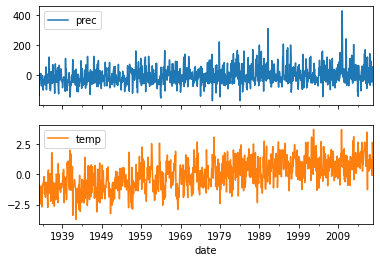

In [ ]:
df_anomaly.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb13dbf0250>,
      dtype=object)

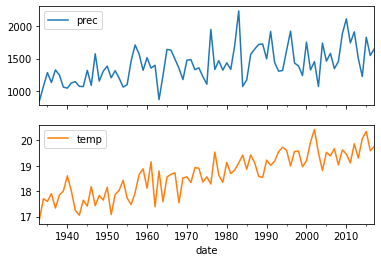

In [ ]:
df_annual.plot(subplots=True)

Com base nos dados anuais conseguimos reparar que existe uma tendência nas variáveis de temperatura e precipitação. Para encontrarmos o valor dessa tendência usamos o pacote `statsmodels`, no entanto você pode usar aquele que se sentir mais confortável. Existem implementações da regressão linear em pacotes como `sklearn` e `numpy`.

In [ ]:
import statsmodels.api as sm

# adiciona coluna de 1s para um ajuste do tipo y = a * x + b * 1
X = sm.add_constant(df_annual.index.year)
y = df_annual['temp']

# ajusta o modelo usando mínimos quadrados (ordinary least squares)
reg = sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     232.4
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           8.81e-26
Time:                        19:47:41   Log-Likelihood:                -47.843
No. Observations:                  85   AIC:                             99.69
Df Residuals:                      83   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.5672      3.754    -10.274      0.000     -46.033     -31.101
x1             0.0290      0.002     15.244      0.000       0.025       0.033
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.427
Skew:                           0.006   Prob(JB):                        0.808
Kurtosis:                       2.653   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O atributo `params` fornece uma `pandas Series` nesse caso com o valor dos parâmetros estimados.

In [ ]:
reg.params  # const = coeficiente linear e x1 = coeficiente angular

const   -38.567171
x1        0.028972
dtype: float64

Podemos ainda obter o intervalo de confiança dos parâmetros da regressão com base na distribuição `t`

In [ ]:
reg.conf_int() # limiar inferior e superior do intervalo de confiança de 95 %

,0,1
const,-46.033353,-31.100990
x1,0.025192,0.032752


O resíduo do ajuste

In [ ]:
reg.resid

date
1933-12-31   -0.546268
1934-12-31    0.234920
1935-12-31    0.100856
1936-12-31    0.373468
1937-12-31   -0.219189
                ...   
2013-12-31   -0.459649
2014-12-31    0.284792
2015-12-31    0.532543
2016-12-31   -0.254440
2017-12-31   -0.114648
Freq: A-DEC, Length: 85, dtype: float64

Os valores do ajuste para cada um dos pontos

In [ ]:
reg.fittedvalues

date
1933-12-31    17.436381
1934-12-31    17.465354
1935-12-31    17.494326
1936-12-31    17.523299
1937-12-31    17.552271
                ...    
2013-12-31    19.754169
2014-12-31    19.783142
2015-12-31    19.812114
2016-12-31    19.841087
2017-12-31    19.870059
Freq: A-DEC, Length: 85, dtype: float64

Vamos, então, fazer uma figura com o ajuste e o resíduo do ajuste.

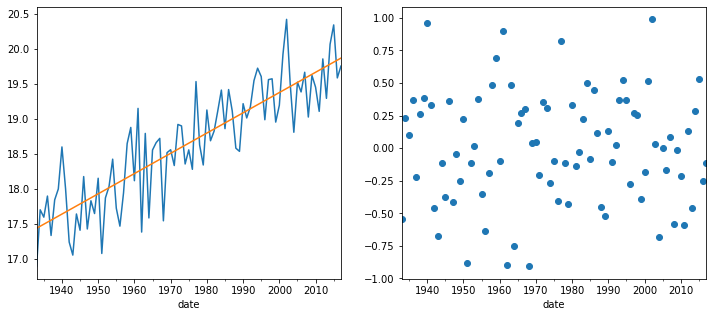

In [ ]:
import matplotlib.pyplot as plt

# Figura criada de forma análoga a:
# fig = plt.figure(figisize=(12,5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5)) 

df_annual['temp'].plot(ax=ax1)
reg.fittedvalues.plot(ax=ax1)

reg.resid.plot(ax=ax2, marker='o', ls='')

Para a precipitação:

In [ ]:
X = sm.add_constant(df_annual.index.year)
y = df_annual['prec']

reg = sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prec   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     35.82
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           5.30e-08
Time:                        19:49:10   Log-Likelihood:                -582.83
No. Observations:                  85   AIC:                             1170.
Df Residuals:                      83   BIC:                             1175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.075e+04   2031.868     -5.289      0.000   -1.48e+04   -6705.467
x1             6.1569      1.029      5.985      0.000       4.111       8.203
==============================================================================
Omnibus:                        5.450   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.750
Skew:                           0.480   Prob(JB):                       0.0930
Kurtosis:                       3.648   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

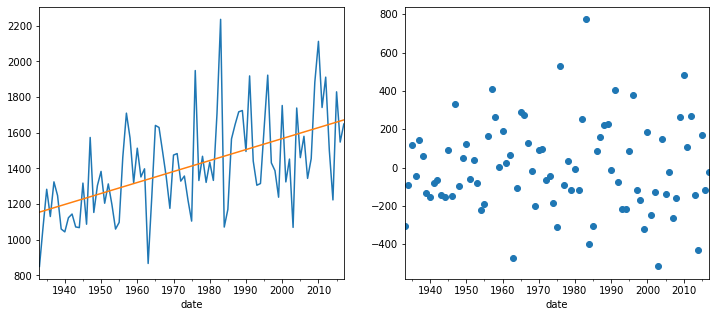

In [ ]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5))

df_annual['prec'].plot(ax=ax1)
reg.fittedvalues.plot(ax=ax1)

reg.resid.plot(ax=ax2, marker='o', ls='')

Vamos agora mostrar como interpolar dados faltantes de estações. Neste caso, vamos usar as temperaturas mínimas registradas diariamente pelas estações automáticas do CGE e pela estação do IAG (`iag_cientec`). É importante verificar quantos valores faltantes existem primeiramente, substituindo qualquer tipo de indicador de dado faltante por `NaN`:

In [ ]:
df_falhas = pd.read_csv('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/Tmin_C_falhas.csv', parse_dates=True, index_col=0, na_values=-9999)

df_falhas

,cge_p1000852,cge_p1000850,cge_p1000857,cge_p1000854,cge_p524,cge_p1000866,cge_p1000840,cge_p1000860,cge_p507,cge_p1000864,cge_p1000844,cge_p1000862,cge_p1000842,cge_p1000848,cge_p504,cge_p515,cge_p509,cge_p540,cge_p510,cge_p1000859,iag_cientec
index,,,,,,,,,,,,,,,,,,,,,
2013-01-01,21.628167,21.171667,19.828667,21.141500,NaN,NaN,21.817833,22.581500,19.820500,NaN,19.315167,21.152833,20.699667,21.505500,19.516667,NaN,21.020500,NaN,21.943833,21.772667,21.5
2013-01-02,17.248833,NaN,16.530333,17.158167,NaN,NaN,17.166667,18.119833,15.937833,NaN,16.983500,17.753833,17.591333,18.150167,18.249167,NaN,17.171500,NaN,18.017667,17.435167,17.4
2013-01-03,17.297500,17.725333,16.604500,17.425000,NaN,NaN,17.175000,18.074667,16.067000,NaN,16.976833,17.228667,17.730500,18.291167,17.782667,NaN,17.359500,NaN,18.084500,17.332667,17.6
2013-01-04,18.289500,18.618500,17.737333,18.608167,NaN,NaN,18.192000,19.155667,17.126333,NaN,18.296167,18.573333,18.932167,19.269667,18.124833,NaN,18.309500,NaN,19.033000,18.494167,18.7
2013-01-05,20.332333,20.240000,19.204167,20.673333,NaN,NaN,20.132500,20.805833,18.826833,NaN,18.313167,19.926000,20.399500,20.933167,19.075000,NaN,19.501333,NaN,20.604167,19.892500,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,21.072500,20.463000,18.782833,21.354333,21.102833,21.211833,21.720333,21.280667,19.635833,20.167833,18.571667,19.968000,19.771833,20.911333,20.033500,20.391000,20.944833,20.280167,21.586333,20.730000,21.0
2015-12-28,20.209833,20.003167,20.042000,20.723333,20.414667,20.938333,20.832500,21.188333,19.788333,20.614333,19.229500,20.332500,19.993333,20.580667,19.718000,20.156000,20.612500,20.240000,21.168333,20.265333,20.8
2015-12-29,20.354167,20.038667,19.953167,20.577333,19.577000,20.169500,20.332000,20.379333,19.672500,20.040000,19.209333,20.005000,19.486167,20.275333,19.377333,15.454800,19.765000,19.575333,20.461333,20.048667,20.3


O número de dados faltantes em cada estação é dado por:

In [ ]:
df_falhas.isnull().sum()

cge_p1000852     22
cge_p1000850     19
cge_p1000857     47
cge_p1000854     22
cge_p524        123
cge_p1000866    133
cge_p1000840     19
cge_p1000860     17
cge_p507         93
cge_p1000864     75
cge_p1000844     12
cge_p1000862     25
cge_p1000842     44
cge_p1000848     14
cge_p504         13
cge_p515         43
cge_p509         24
cge_p540        172
cge_p510        124
cge_p1000859     11
iag_cientec      76
dtype: int64

Vamos interpolar usando o método já fornecido pelo pandas `interpolate`. Esse método recebe um argumento `method` que indica qual o tipo de interpolação que será usada. Vamos usar `method='linear'` que significa que dados três valores `a, b e c` em que `b = NaN` ele irá interpolar como `b = (a + c) / 2`.

In [ ]:
station = 'iag_cientec'
missing = df_falhas[station].isnull()

y_interp1 = df_falhas[station].interpolate('linear')
y_interp1 = y_interp1[missing]

y_interp1

index
2013-06-09    14.85
2013-06-17    13.60
2013-06-30    14.60
2013-07-06    12.65
2013-07-19    12.25
              ...  
2015-11-25    19.20
2015-12-04    19.45
2015-12-14    20.50
2015-12-17    19.75
2015-12-30    20.45
Name: iag_cientec, Length: 76, dtype: float64

Um outro jeito que podemos fazer essa interpolação é usando as estações vizinhas por meio da regressão linear múltipla. Para isso primeiro precisamos remover todos os `NaNs` e obter os parâmetros da regressão: 

In [ ]:
df_reg = df_falhas.dropna()
df_reg_without_iag = df_reg.drop(station, axis=1)  # remove iag do dataframe para fazer a regressão com a estações vizinhas

y = df_reg[station]
X = sm.add_constant(df_reg_without_iag) # adiciona coluna de 1s

reg = sm.OLS(y, X).fit()

reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            iag_cientec   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1453.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:52:31   Log-Likelihood:                -316.97
No. Observations:                 573   AIC:                             675.9
Df Residuals:                     552   BIC:                             767.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0895      0.146      0.613      0.540      -0.197       0.376
cge_p1000852     0.1214      0.068      1.791      0.074      -0.012       0.254
cge_p1000850     0.1242      0.060      2.077      0.038       0.007       0.242
cge_p1000857    -0.0053      0.022     -0.236      0.813      -0.049       0.038
cge_p1000854    -0.1198      0.058     -2.073      0.039      -0.233      -0.006
cge_p524        -0.0135      0.066     -0.204      0.838      -0.144       0.117
cge_p1000866    -0.1214      0.080     -1.525      0.128      -0.278       0.035
cge_p1000840     0.3652      0.059      6.161      0.000       0.249       0.482
cge_p1000860     0.1652      0.088      1.886      0.060      -0.007       0.337
cge_p507         0.1498      0.033      4.484      0.000       0.084       0.215
cge_p1000864     0.0425      0.054      0.780      0.436      -0.065       0.150
cge_p1000844     0.3057      0.036      8.467      0.000       0.235       0.377
cge_p1000862     0.0328      0.058      0.562      0.575      -0.082       0.147
cge_p1000842     0.2476      0.037      6.645      0.000       0.174       0.321
cge_p1000848     0.0116      0.059      0.195      0.846      -0.105       0.128
cge_p504         0.0281      0.026      1.084      0.279      -0.023       0.079
cge_p515        -0.0614      0.034     -1.820      0.069      -0.128       0.005
cge_p509        -0.0358      0.051     -0.707      0.480      -0.135       0.064
cge_p540        -0.0633      0.050     -1.269      0.205      -0.161       0.035
cge_p510        -0.0266      0.062     -0.429      0.668      -0.148       0.095
cge_p1000859    -0.1182      0.083     -1.422      0.155      -0.281       0.045
==============================================================================
Omnibus:                       24.482   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.796
Skew:                           0.165   Prob(JB):                     2.82e-13
Kurtosis:                       4.520   Cond. No.                         634.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vamos agora interpolar usando o método `predict` da regressão múltipla:

In [ ]:
# seleciona apenas onde há dados faltantes da estação selecionada
X_missing = sm.add_constant(df_falhas[missing].drop(station, axis=1))

y_interp2 = reg.predict(X_missing)

y_interp2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


index
2013-06-09    14.641123
2013-06-17    15.396498
2013-06-30    15.468179
2013-07-06    13.580966
2013-07-19    13.449172
                ...    
2015-11-25    19.391272
2015-12-04    18.807403
2015-12-14    20.230008
2015-12-17    19.078432
2015-12-30    20.431965
Length: 76, dtype: float64

Como os dados faltantes foram introduzidos de forma artificial na estação `iag_cientec` podemos calcular o erro quadrático médio dado por $RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - x_i)^2}$ dos dois métodos e verificar qual é mais efetivo para interpolar os dados faltantes.

In [ ]:
df_completo = pd.read_csv('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/Tmin_C_completo.csv', parse_dates=True, index_col=0)

df_completo

,cge_p1000852,cge_p1000850,cge_p1000857,cge_p1000854,cge_p524,cge_p1000866,cge_p1000840,cge_p1000860,cge_p507,cge_p1000864,cge_p1000844,cge_p1000862,cge_p1000842,cge_p1000848,cge_p504,cge_p515,cge_p509,cge_p540,cge_p510,cge_p1000859,iag_cientec
index,,,,,,,,,,,,,,,,,,,,,
2013-01-01,21.628167,21.171667,19.828667,21.141500,NaN,NaN,21.817833,22.581500,19.820500,NaN,19.315167,21.152833,20.699667,21.505500,19.516667,NaN,21.020500,NaN,21.943833,21.772667,21.5
2013-01-02,17.248833,NaN,16.530333,17.158167,NaN,NaN,17.166667,18.119833,15.937833,NaN,16.983500,17.753833,17.591333,18.150167,18.249167,NaN,17.171500,NaN,18.017667,17.435167,17.4
2013-01-03,17.297500,17.725333,16.604500,17.425000,NaN,NaN,17.175000,18.074667,16.067000,NaN,16.976833,17.228667,17.730500,18.291167,17.782667,NaN,17.359500,NaN,18.084500,17.332667,17.6
2013-01-04,18.289500,18.618500,17.737333,18.608167,NaN,NaN,18.192000,19.155667,17.126333,NaN,18.296167,18.573333,18.932167,19.269667,18.124833,NaN,18.309500,NaN,19.033000,18.494167,18.7
2013-01-05,20.332333,20.240000,19.204167,20.673333,NaN,NaN,20.132500,20.805833,18.826833,NaN,18.313167,19.926000,20.399500,20.933167,19.075000,NaN,19.501333,NaN,20.604167,19.892500,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,21.072500,20.463000,18.782833,21.354333,21.102833,21.211833,21.720333,21.280667,19.635833,20.167833,18.571667,19.968000,19.771833,20.911333,20.033500,20.391000,20.944833,20.280167,21.586333,20.730000,21.0
2015-12-28,20.209833,20.003167,20.042000,20.723333,20.414667,20.938333,20.832500,21.188333,19.788333,20.614333,19.229500,20.332500,19.993333,20.580667,19.718000,20.156000,20.612500,20.240000,21.168333,20.265333,20.8
2015-12-29,20.354167,20.038667,19.953167,20.577333,19.577000,20.169500,20.332000,20.379333,19.672500,20.040000,19.209333,20.005000,19.486167,20.275333,19.377333,15.454800,19.765000,19.575333,20.461333,20.048667,20.3


In [ ]:
def calculate_rmse(y, x):
  return np.sqrt(((y - x) ** 2).mean())

In [ ]:
y = df_completo.loc[missing, station]

rmse1 = calculate_rmse(y_interp1, y)
rmse2 = calculate_rmse(y_interp2, y)

print(f'Linear interpolation RMSE = {rmse1:.3f}')
print(f'MLR interpolation RMSE = {rmse2:.3f}')

Linear interpolation RMSE = 1.249
MLR interpolation RMSE = 0.477


**Exercício:** Leia o arquivo `/content/drive/Shareddrives/Curso_Python2022/dados_PNBOIA/historico_santos.csv` e converta a velocidade e direção do vento nas componentes zonal e meridional usando as equações:

$u = - w \sin{\delta} \\ v = - w \cos{\delta}$

Onde $w$ é a velocidade do vento e $\delta$ é a direção. Adicione essas componentes como colunas do dataframe. Calcule as médias mensais e anuais e identifique quais são os períodos de maior e menor vento. Há mudanças nas direções predominantes? **Obs:** Não se esqueça de remover os dados faltantes.


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Curso_Python2022/dados_PNBOIA/historico_santos.csv', parse_dates=['datetime'])

,datetime,wspd,wdir
0,2011-04-12 19:00:00,4.5,48.0
1,2011-04-12 20:00:00,5.5,70.0
2,2011-04-12 21:00:00,6.6,63.0
3,2011-04-12 22:00:00,7.0,62.0
4,2011-04-12 23:00:00,4.9,57.0
...,...,...,...
59490,2018-12-09 05:00:00,6.5,56.0
59491,2018-12-09 06:00:00,6.0,45.0
59492,2018-12-09 07:00:00,5.0,56.0
59493,2018-12-09 08:00:00,4.5,70.0
